In [44]:
import keras

In [45]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [46]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [47]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [48]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [49]:
model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

In [50]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mse',
             metrics=['accuracy'])

In [51]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.mse])

In [52]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [53]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 246us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - val_acc: 0.4947
Epoch 2/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - val_acc: 0.4947
Epoch 3/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - val_acc: 0.4947
Epoch 4/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - val_acc: 0.4947
Epoch 5/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - val_acc: 0.4947
Epoch 6/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - val_acc: 0.4947
Epoch 7/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.2500 - acc: 0.5035 - val_loss: 0.2500 - 

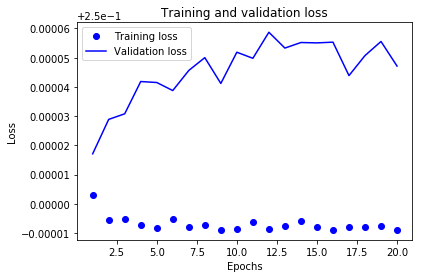

In [54]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

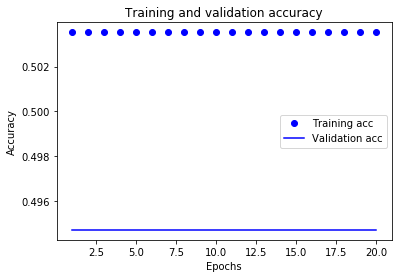

In [55]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [56]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1 ,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 120us/step - loss: 0.6932 - accuracy: 0.4976
Epoch 2/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.6932 - accuracy: 0.4990
Epoch 4/4
25000/25000 [==============================] - 4s 156us/step


In [57]:
results

[0.6931520657348633, 0.5]